In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.drop('User ID' ,axis = 1,inplace =True)

In [5]:
df['Gender'].replace({'Male':0,'Female':1})

0      0
1      0
2      1
3      1
4      0
      ..
395    1
396    0
397    1
398    0
399    1
Name: Gender, Length: 400, dtype: int64

In [6]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df1= df[['Age','EstimatedSalary']]

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [9]:
x =df1.copy()
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


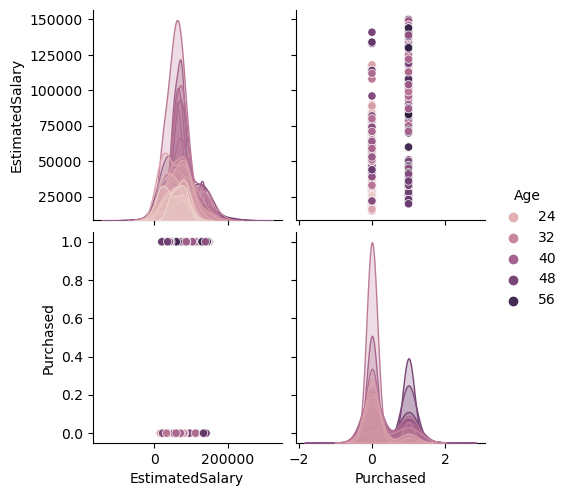

In [10]:
sns.pairplot(df,hue = 'Age')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

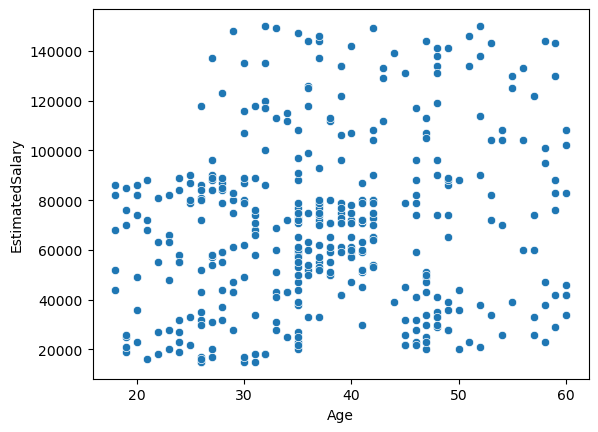

In [29]:
sns.scatterplot(x=df1['Age'],y=df1['EstimatedSalary'])

In [12]:
kmean = KMeans(n_clusters=3)
kmean.fit(x)

KMeans(n_clusters=3)

In [13]:
y_var = kmean.predict(x)
y_var

array([1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1,

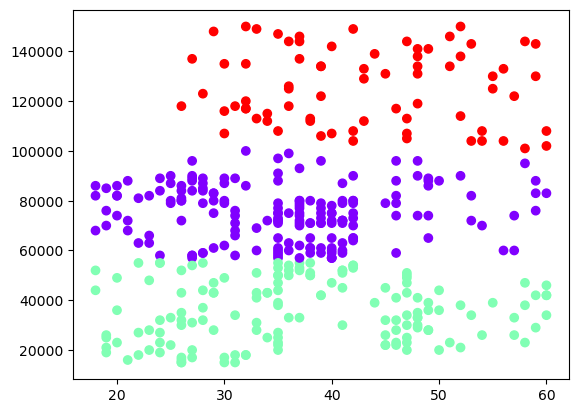

In [23]:
plt.scatter(df['Age'],df['EstimatedSalary'],c=y_var,cmap='rainbow')

In [15]:
kmean.cluster_centers_

array([[3.57988827e+01, 7.50502793e+04],
       [3.72972973e+01, 3.57432432e+04],
       [4.29315068e+01, 1.25657534e+05]])

In [16]:
wcss_list = []
for i in range(1,7):
    kmean = KMeans(n_clusters=i)
    kmean.fit(x)
    wcss = kmean.inertia_
    print(f"k = {i} and wcss = {wcss}")
    wcss_list.append(wcss)

k = 1 and wcss = 463878521346.3898
k = 2 and wcss = 165294660409.80988
k = 3 and wcss = 59489963536.99382
k = 4 and wcss = 33459749146.525555
k = 5 and wcss = 19983401049.300735
k = 6 and wcss = 14670898069.871471


Text(0.5, 1.0, 'Elbow Method to find out the best value')

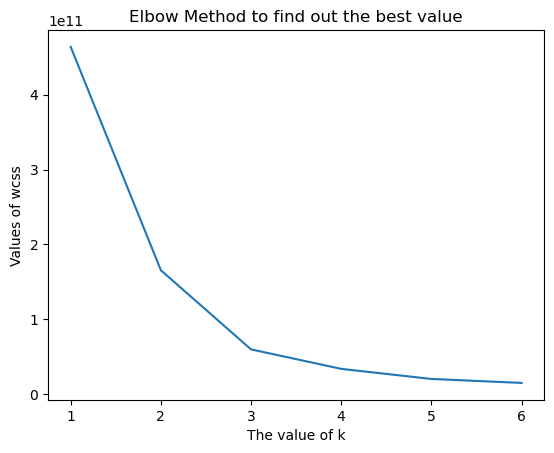

In [24]:
k = range(1,7)
plt.plot(k,wcss_list)
plt.xlabel("The value of k")
plt.ylabel("Values of wcss")
plt.title("Elbow Method to find out the best value")

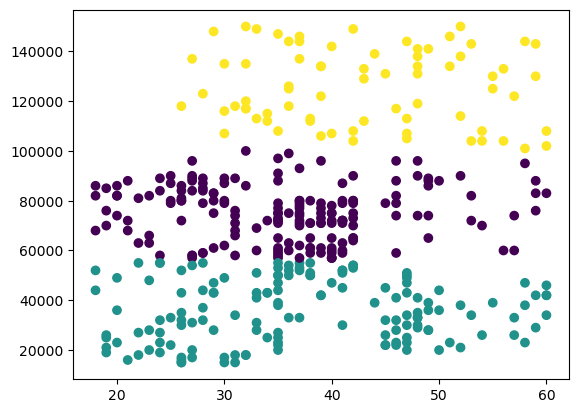

In [26]:
plt.scatter(df["Age"],df['EstimatedSalary'] ,c =y_var)

In [31]:
# K Mean clustering Data 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('cust_segmentation_Data.csv')
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [36]:
df['DebtIncomeRatio'].unique()

array([ 6.3, 12.8, 20.9,  7.2, 10.9,  1.6,  6.6, 15.5,  4. ,  6.1,  6.5,
       17.6,  9.4,  9.2,  2.5, 10.6, 10.8,  4.2, 13. , 19.8,  8.4, 17.3,
        8.8,  2.6, 13.5,  2.4, 10.1, 15. ,  3.9, 10. ,  7.7,  5.4, 12.9,
        4.4,  6.8,  9.7, 12. , 23.8,  5.9, 21.3, 13.1, 17.5,  3.5,  4.1,
        6.2,  5.5, 32.5, 24.4,  3.3, 19.9, 12.6,  4.8,  6. , 13.7, 15.4,
       11.2, 13.4,  3.7,  8. , 10.5, 14.7, 16.1,  2.8,  1.9,  7.9, 12.2,
       29.7,  9.1,  8.2, 18.4, 18.6,  2.2,  0.9,  1.2, 14.8,  4.7, 25.4,
        9. , 13.2, 30.1,  2.9, 14.4,  3. ,  5.7,  9.5, 16. ,  9.8, 10.7,
        8.1, 18.2, 11.5,  8.3,  5. ,  1.7,  3.4,  4.5, 13.9, 11. , 16.4,
        8.7, 11.8, 25.1, 10.3, 23.4,  9.3, 17.2,  5.6, 17.1, 14.6, 19.2,
        0.8,  2.7, 14.3, 12.3, 28.9,  5.1, 12.4, 25.3, 26.3, 26. ,  7. ,
        8.9,  1.1, 20.3, 24.5,  0.1,  4.6, 13.8,  3.1,  3.6,  1. , 17.8,
       23.3, 12.1,  2.1, 12.5,  5.8,  6.7,  4.9, 14.1, 24.6, 17. , 16.9,
       12.7, 14. , 23. , 11.3,  3.2,  7.1,  6.4,  8

In [37]:
df = df[['Income','DebtIncomeRatio']]
df

,Income,DebtIncomeRatio
0,19,6.3
1,100,12.8
2,57,20.9
3,19,6.3
4,253,7.2
...,...,...
845,26,6.8
846,34,7.0
847,18,33.4
848,28,2.9


In [39]:
x = df.copy()
x

,Income,DebtIncomeRatio
0,19,6.3
1,100,12.8
2,57,20.9
3,19,6.3
4,253,7.2
...,...,...
845,26,6.8
846,34,7.0
847,18,33.4
848,28,2.9


<AxesSubplot:xlabel='Income', ylabel='DebtIncomeRatio'>

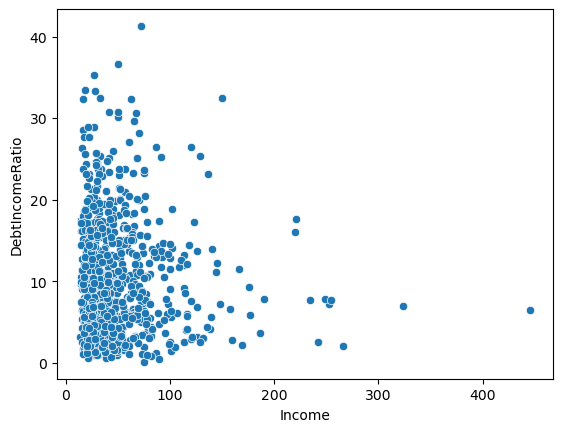

In [44]:
sns.scatterplot(x =df['Income'],y =df['DebtIncomeRatio'])

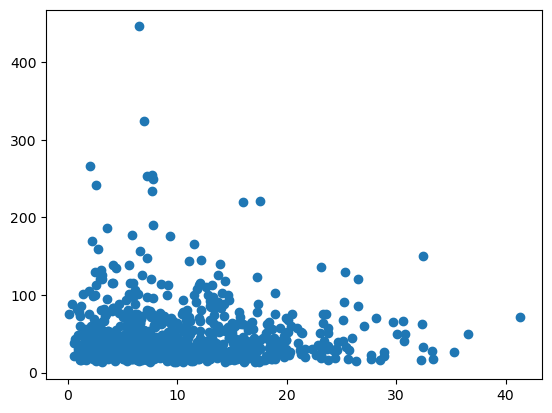

In [43]:
plt.scatter(df['DebtIncomeRatio'],df['Income'])

# Model Training

In [54]:
kmean = KMeans(n_clusters=10)
kmean.fit(x)

KMeans(n_clusters=10)

In [55]:
y_var = kmean.predict(x)

In [56]:
kmean.inertia_

58029.906116071725

In [57]:
kmean.cluster_centers_

array([[ 23.01824818,   7.12846715],
       [172.5       ,   6.2125    ],
       [ 74.37878788,   8.64242424],
       [251.44444444,   8.4       ],
       [ 96.22857143,   9.92      ],
       [ 39.70952381,   8.41285714],
       [446.        ,   6.5       ],
       [ 24.16363636,  19.45363636],
       [126.12903226,  10.2483871 ],
       [ 57.49056604,  13.38679245]])

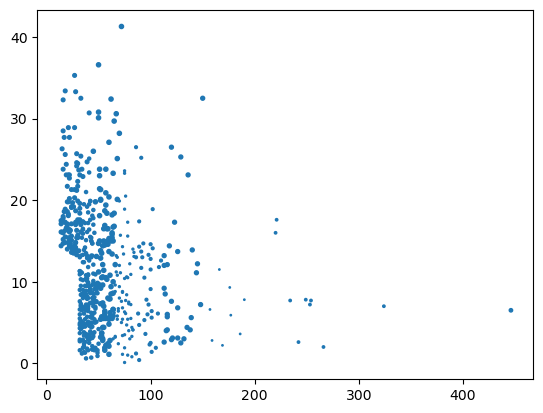

In [58]:
# Plotting graph
plt.scatter(df['Income'],df['DebtIncomeRatio'],y_var)

# WCSS Within  clusters sum of square

In [59]:
wcss_list= []
for i in range(1,12):
    kmean = KMeans(n_clusters=i)
    kmean.fit(x)
    wcss = kmean.inertia_
    print(f'Value of k ={i} and wcss = {wcss}')
    wcss_list.append(wcss)

Value of k =1 and wcss = 1299579.4878705884
Value of k =2 and wcss = 566668.0965265136
Value of k =3 and wcss = 302733.47238837916
Value of k =4 and wcss = 189981.21392994694
Value of k =5 and wcss = 145366.16989820736
Value of k =6 and wcss = 111197.05830432403
Value of k =7 and wcss = 88089.02526667184
Value of k =8 and wcss = 75860.78306989471
Value of k =9 and wcss = 64235.61406749436
Value of k =10 and wcss = 58313.499649984245
Value of k =11 and wcss = 51954.14928642143


Text(0.5, 1.0, 'Using Wcss means elbow method')

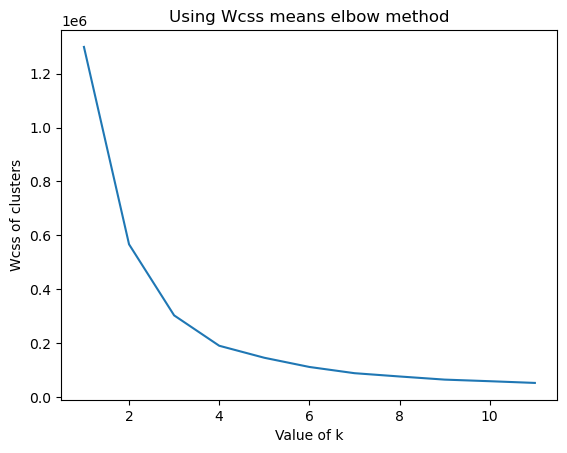

In [60]:
k = range(1,12)
plt.plot(k,wcss_list)
plt.xlabel("Value of k")
plt.ylabel("Wcss of clusters")
plt.title('Using Wcss means elbow method')

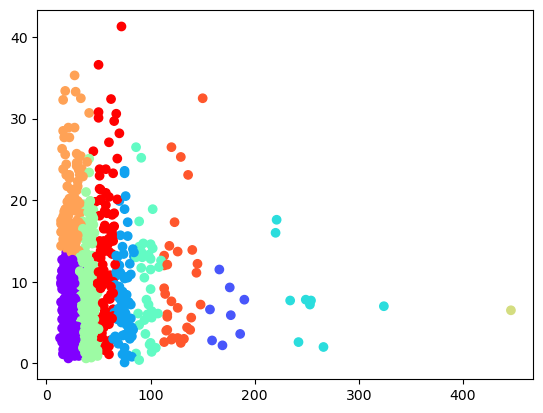

In [62]:
plt.scatter(df['Income'],df['DebtIncomeRatio'],c =y_var,cmap ='rainbow')

In [64]:
# model Training 
kmean = KMeans(n_clusters=4)
kmean.fit(x)

KMeans(n_clusters=4)

In [65]:
y_var = kmean.predict(x)

In [67]:
kmean.inertia_

190037.67490058643

In [68]:
kmean.cluster_centers_

array([[ 28.50086957,  10.01391304],
       [123.89830508,   9.1       ],
       [ 64.40291262,  11.01407767],
       [270.9       ,   8.21      ]])

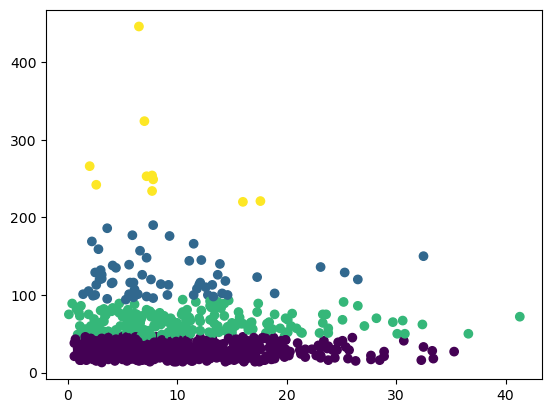

In [69]:
plt.scatter(df['DebtIncomeRatio'],df['Income'],c=y_var)